In [1]:
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D, MaxPool2D

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

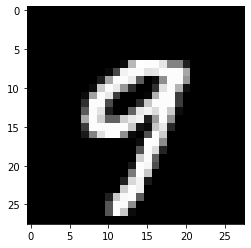

In [3]:
plt.imshow(x_train[45], cmap='gray')

In [4]:
# just displaying some info to see what's there

print(type(x_train[45]))
print(x_train[45].shape)

<class 'numpy.ndarray'>
(28, 28)


In [5]:
x_train.shape
# 60000 images, 28x28 pixels

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
model = Sequential()

In [8]:
# 32 - number of filters
# 3 - size of filters (3x3)
# input_shape=(28, 28, 1) - our images are 28x28 pixels.
# All images must be the same size. 
# 1 in input_shape(28,28,1) means number of channels. Grayscale have 1 channel, RGB 3 channels, RGBa 4 channels

model.add(Convolution2D(32, 3, activation='relu', input_shape=(28, 28, 1)))

In [9]:
# input_shape=(28, 28, 1) - if TensorFlow is as a backend, the number of channels is put as the last parameter
# by default Keras uses TensorFlow.
# But if Keras uses other backend, the number of channels may go as first parameter.
# To make sure where to put the namber of channels use the following code

from keras import backend
backend.image_data_format()

'channels_last'

In [10]:
# you can display info about layers in a model
model.layers

# one layer - convolutional

In [11]:
# by applying 3x3 filter the output shape of image will change
# it will 'shrink' by 1 at each side i.e., 28x28 => 26x26
# Convolution2D class has paramater padding that takes either "valid" or "same". 
# 'valid' is default and it will 'shrink' shape
# 'same' keeps the shape. It simply adds padding to the original shape with all valus 0, so after convolution the shape is the same as original
# we can display the output shape

model.output_shape

(None, 26, 26, 32)

In [12]:
# MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))

In [13]:
model.output_shape

(None, 13, 13, 32)

In [14]:
# add on more convolutional layers

model.add(Convolution2D(32, 3, activation='relu')) # no need to specify input size
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # drop some data

In [15]:
# Dense function expect a flat input, 1 dimentional array
# we add flatten layer to the model. It just flattens the input

model.add(Flatten())

In [16]:
model.output_shape

# 800 features, but more meaningful than using raw pixels. Features contain 'local features' - info about shape  

(None, 800)

In [17]:
# add Dense layer
# 128 was choosen by me. It my be different number. Not too low and not too high
model.add(Dense(128, activation='relu'))

In [18]:
model.output_shape

(None, 128)

In [19]:
# add output layer
# there are 10 digits -> 10 classes. The output is 10

model.add(Dense(10, activation='softmax'))

In [20]:
model.output_shape

(None, 10)

In [21]:
# compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# before training we have to reshape input data (shape of images)
# the first layer of model (Convolution2D layer) is expected image data of shape (28,28,1)
# but our data have shape (28,28)

print(x_train.shape)
# 60000 refers to the number of images

# shape of single image, i.e. the first one in array:
print(x_train[0].shape)

# the shape of image is (28,28), but we need shape (28,28,1)
# (28,28,1) is a 3D array i.e.
# [[[0],[225], ..., [180]],[[34],[167], ..., [145]] ..., [[222],[54], ..., [68]]]
# 28 pixels iwdth, 28 pixels height, 1 - grayscale

# for RGB image the shape will be (28,28,3)
# [[[0, 50, 255],[200, 78, 190], ..., [180, 67, 255]], ...]

(60000, 28, 28)
(28, 28)


In [23]:
# numpy has method to reshape numpy array. And we have numpy array, so we can use this method
print(type(x_train[0]))

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train[0].shape)

<class 'numpy.ndarray'>
(28, 28, 1)


In [24]:
# convert target data to categorical

y_train
# target data is 1-dimentional array with a range of values from 0 to 9 (10 digits)
# we need 2d array with true-false / 0, 1 values

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
# convert target data to categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:1]) # display first row

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [26]:
# train model
# keep the history in log

log = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3600 - accuracy: 0.9242 - val_loss: 0.0726 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0997 - accuracy: 0.9698 - val_loss: 0.0471 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0768 - accuracy: 0.9761 - val_loss: 0.0537 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0396 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0421 - val_accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.0406 -

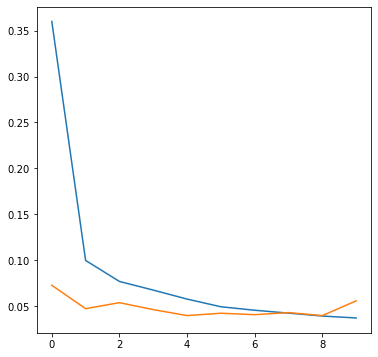

In [27]:
# loss plot
plt.figure(figsize=(6, 6))

plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])

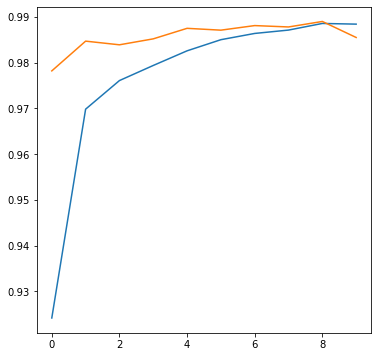

In [28]:
# accuracy plot
plt.figure(figsize=(6, 6))

plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])